# Exploring Educational Inequality 

In creating my corpus on educational inequality, I used the Wikipedia API, focusing on articles within the category specifically related to educational inequality. Wikipedia, being a neutral and extensive information source, provided a rich dataset. 

Initially, I imported the necessary libraries and employed the Wikipedia API to extract the first 500 articles on "educational inequality." The extracted data was then structured into a DataFrame, with one column containing the titles and the other containing the text. This step facilitated efficient data manipulation and preparation for analysis.
Following this, the data underwent pre-processing, starting with lemmatization and tokenization. Lemmatization is a process that transforms words into their meaningful base form, was employed to ensure consistency and focus on the essential semantics of the text. Tokenization, breaking down the text into individual words and phrases, was crucial for subsequent analyses.
Tokenization played a important role in understanding the distribution of specific words within the corpus. By breaking down the text into smaller units, I gained insights into word frequencies and patterns. This step provided a foundation for deeper linguistic analysis.

Later, to refine the dataset, I addressed the impact of punctuation and stopwords. Punctuation removal was essential to ensure that the analysis wasn't influenced by irrelevant characters, and the NLTK Punkt tokenizer was used to achieve this. Stopwords, common words with little semantic value, were then removed to focus on content-rich words.

The core of my analysis involved conducting a frequency analysis to examine how often each word appeared in the corpus. This process revealed key themes such as income, government, and America. The frequency distribution provided valuable insights into the most prevalent terms, shedding light on recurring topics and trends related to educational inequality. Moving forward I would create heatmaps to visually see and compare the frequency of the words between articles and also conduct a VAD analysis. 


In [41]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install wikipedia-api

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install wikipedia reader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import IFrame
import random
import sympy
from collections import Counter
import random
from random import sample

import gensim
import gensim.downloader as api
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from scipy.spatial import distance
import matplotlib.pyplot as plt
import wikipedia 
import wikipediaapi

import nltk
nltk.download('brown')
nltk.download('wordnet')
nltk.download('words')
from nltk.corpus import brown
from nltk.corpus import wordnet as wn
from nltk.metrics import edit_distance
from nltk.metrics import jaccard_distance
nltk.download('omw-1.4')
from nltk.corpus import words

nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
import string
punct = list(string.punctuation)

[nltk_data] Downloading package brown to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#uses wikipedia to search the category interested in and outputs the first 20 results
wikipedia.search("educational inequality", results = 20)

['Educational inequality',
 'Educational inequality in the United States',
 'Education in the United Kingdom',
 'Inequality',
 'Social inequality',
 'Education',
 'Special education',
 'Sonya Douglass',
 'Colonial roots of gender inequality in Africa',
 'Educational inequality in Ghana',
 'International inequality',
 'Educational inequality in southeast Michigan',
 'Participation inequality',
 'Income inequality in the United States',
 'Education in the United States',
 'Economic inequality',
 'Gender inequality in India',
 'Education inequality in China',
 'Banking model of education',
 'School discipline']

In [5]:
import wikipediaapi

# this specifies the language and user agent
wiki_wiki = wikipediaapi.Wikipedia(language='en', user_agent='CorpusPriya', extract_format=wikipediaapi.ExtractFormat.WIKI)

# this searches for pages related to "educational inequality"
search_results = wikipedia.search("educational inequality", results=500)

# and then creates a dictionary to store titles and summaries
my_file = {}

# iterates through the search results
for title in search_results:
    # this retrieves the content of each of the pages
    page = wiki_wiki.page(title)
    
    # checks to see if the page exists
    if page.exists():
        # saves title and summary to the dictionary
        my_file[title] = {
            'title': title,
            'summary': page.text  
        }
import pandas as pd

data_list = [{'title': key, 'summary': value['summary']} for key, value in my_file.items()]

# creates a DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)
df

,title,summary
0,Educational inequality,Educational inequality is the unequal distribu...
1,Educational inequality in the United States,Unequal access to education in the United Stat...
2,Education in the United Kingdom,Education in the United Kingdom is a devolved ...
3,Inequality,Inequality may refer to:\n\nEconomics\nAttenti...
4,Social inequality,Social inequality occurs when resources within...
...,...,...
495,Nations and IQ,The relationship between nations and IQ is a c...
496,Social construction of gender,The social construction of gender is a theory ...
497,Google,Google LLC ( ) is an American multinational te...
498,Education in Bihar,Bihar has been a major centre of learning and ...


In [6]:
# creates a lemmatizer
lemmatizer = WordNetLemmatizer()

# tokenize and lemmatize the texts in the DataFrame
df['tokenized'] = df['summary'].apply(lambda x: word_tokenize(x))
df['lemmatized'] = df['tokenized'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# prints the modified DataFrame
print(df)
df

                                           title  \
0                         Educational inequality   
1    Educational inequality in the United States   
2                Education in the United Kingdom   
3                                     Inequality   
4                              Social inequality   
..                                           ...   
495                               Nations and IQ   
496                Social construction of gender   
497                                       Google   
498                           Education in Bihar   
499                                   Corruption   

                                               summary  \
0    Educational inequality is the unequal distribu...   
1    Unequal access to education in the United Stat...   
2    Education in the United Kingdom is a devolved ...   
3    Inequality may refer to:\n\nEconomics\nAttenti...   
4    Social inequality occurs when resources within...   
..                         

,title,summary,tokenized,lemmatized
0,Educational inequality,Educational inequality is the unequal distribu...,"[Educational, inequality, is, the, unequal, di...","[Educational, inequality, is, the, unequal, di..."
1,Educational inequality in the United States,Unequal access to education in the United Stat...,"[Unequal, access, to, education, in, the, Unit...","[Unequal, access, to, education, in, the, Unit..."
2,Education in the United Kingdom,Education in the United Kingdom is a devolved ...,"[Education, in, the, United, Kingdom, is, a, d...","[Education, in, the, United, Kingdom, is, a, d..."
3,Inequality,Inequality may refer to:\n\nEconomics\nAttenti...,"[Inequality, may, refer, to, :, Economics, Att...","[Inequality, may, refer, to, :, Economics, Att..."
4,Social inequality,Social inequality occurs when resources within...,"[Social, inequality, occurs, when, resources, ...","[Social, inequality, occurs, when, resource, w..."
...,...,...,...,...
495,Nations and IQ,The relationship between nations and IQ is a c...,"[The, relationship, between, nations, and, IQ,...","[The, relationship, between, nation, and, IQ, ..."
496,Social construction of gender,The social construction of gender is a theory ...,"[The, social, construction, of, gender, is, a,...","[The, social, construction, of, gender, is, a,..."
497,Google,Google LLC ( ) is an American multinational te...,"[Google, LLC, (, ), is, an, American, multinat...","[Google, LLC, (, ), is, an, American, multinat..."
498,Education in Bihar,Bihar has been a major centre of learning and ...,"[Bihar, has, been, a, major, centre, of, learn...","[Bihar, ha, been, a, major, centre, of, learni..."


In [7]:
# creates a lemmatizer and set of stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# a function to preprocess text (tokenization, lemmatization, stopword removal, punctuation removal)
def preprocess_text(text):
    # tokenize the text
    tokens = word_tokenize(text)
    
    # lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # removes any stopwords and punctuation
    cleaned_tokens = [token for token in lemmatized_tokens if token.lower() not in stop_words and token not in string.punctuation]

    return cleaned_tokens

# applies the preprocessing function to the 'summary' column
df['processed_text'] = df['summary'].apply(preprocess_text)
df

,title,summary,tokenized,lemmatized,processed_text
0,Educational inequality,Educational inequality is the unequal distribu...,"[Educational, inequality, is, the, unequal, di...","[Educational, inequality, is, the, unequal, di...","[Educational, inequality, unequal, distributio..."
1,Educational inequality in the United States,Unequal access to education in the United Stat...,"[Unequal, access, to, education, in, the, Unit...","[Unequal, access, to, education, in, the, Unit...","[Unequal, access, education, United, States, r..."
2,Education in the United Kingdom,Education in the United Kingdom is a devolved ...,"[Education, in, the, United, Kingdom, is, a, d...","[Education, in, the, United, Kingdom, is, a, d...","[Education, United, Kingdom, devolved, matter,..."
3,Inequality,Inequality may refer to:\n\nEconomics\nAttenti...,"[Inequality, may, refer, to, :, Economics, Att...","[Inequality, may, refer, to, :, Economics, Att...","[Inequality, may, refer, Economics, Attention,..."
4,Social inequality,Social inequality occurs when resources within...,"[Social, inequality, occurs, when, resources, ...","[Social, inequality, occurs, when, resource, w...","[Social, inequality, occurs, resource, within,..."
...,...,...,...,...,...
495,Nations and IQ,The relationship between nations and IQ is a c...,"[The, relationship, between, nations, and, IQ,...","[The, relationship, between, nation, and, IQ, ...","[relationship, nation, IQ, controversial, area..."
496,Social construction of gender,The social construction of gender is a theory ...,"[The, social, construction, of, gender, is, a,...","[The, social, construction, of, gender, is, a,...","[social, construction, gender, theory, humanit..."
497,Google,Google LLC ( ) is an American multinational te...,"[Google, LLC, (, ), is, an, American, multinat...","[Google, LLC, (, ), is, an, American, multinat...","[Google, LLC, American, multinational, technol..."
498,Education in Bihar,Bihar has been a major centre of learning and ...,"[Bihar, has, been, a, major, centre, of, learn...","[Bihar, ha, been, a, major, centre, of, learni...","[Bihar, ha, major, centre, learning, home, one..."


In [18]:
# a new DataFrame with title and processed text
df_clean = df[['title', 'processed_text']].copy()

df_clean

,title,processed_text
0,Educational inequality,"[Educational, inequality, unequal, distributio..."
1,Educational inequality in the United States,"[Unequal, access, education, United, States, r..."
2,Education in the United Kingdom,"[Education, United, Kingdom, devolved, matter,..."
3,Inequality,"[Inequality, may, refer, Economics, Attention,..."
4,Social inequality,"[Social, inequality, occurs, resource, within,..."
...,...,...
495,Nations and IQ,"[relationship, nation, IQ, controversial, area..."
496,Social construction of gender,"[social, construction, gender, theory, humanit..."
497,Google,"[Google, LLC, American, multinational, technol..."
498,Education in Bihar,"[Bihar, ha, major, centre, learning, home, one..."


In [21]:
# combines all processed texts into a single list
all_tokens = [token for tokens_list in df_clean['processed_text'] for token in tokens_list]

# this uses counter to count the frequency of each word
word_freq = Counter(all_tokens)

# this converts the result to a DataFrame for easier manipulation and analysis
df_word_freq = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# this will sort the DataFrame by frequency in descending order
df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)

df_word_freq.head(20)


,Word,Frequency
233,``,10235
676,wa,9999
76,'s,9820
242,'',9667
8,school,9053
43,education,7619
272,ha,6641
109,student,6587
296,also,5053
492,woman,4625


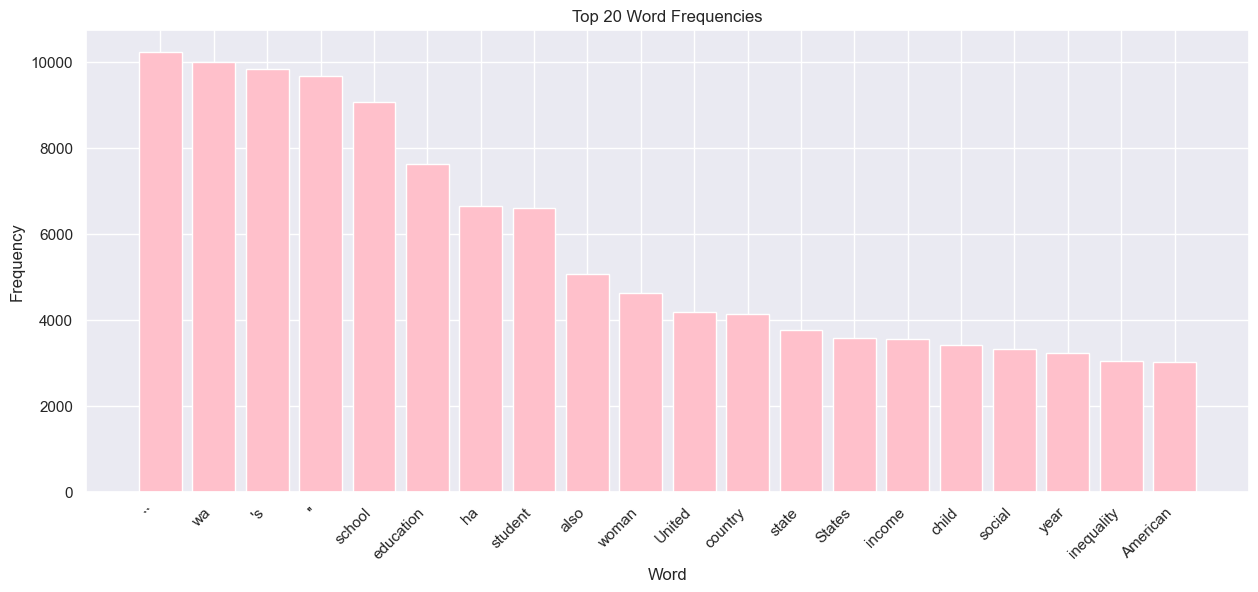

In [36]:
# plot a bar chart of the top 20 word frequencies
plt.figure(figsize=(15, 6))
plt.bar(df_word_freq['Word'][:20], df_word_freq['Frequency'][:20], color='pink')
plt.title('Top 20 Word Frequencies')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # this rotates the angle of the x-axis labels for better visibility
plt.show()


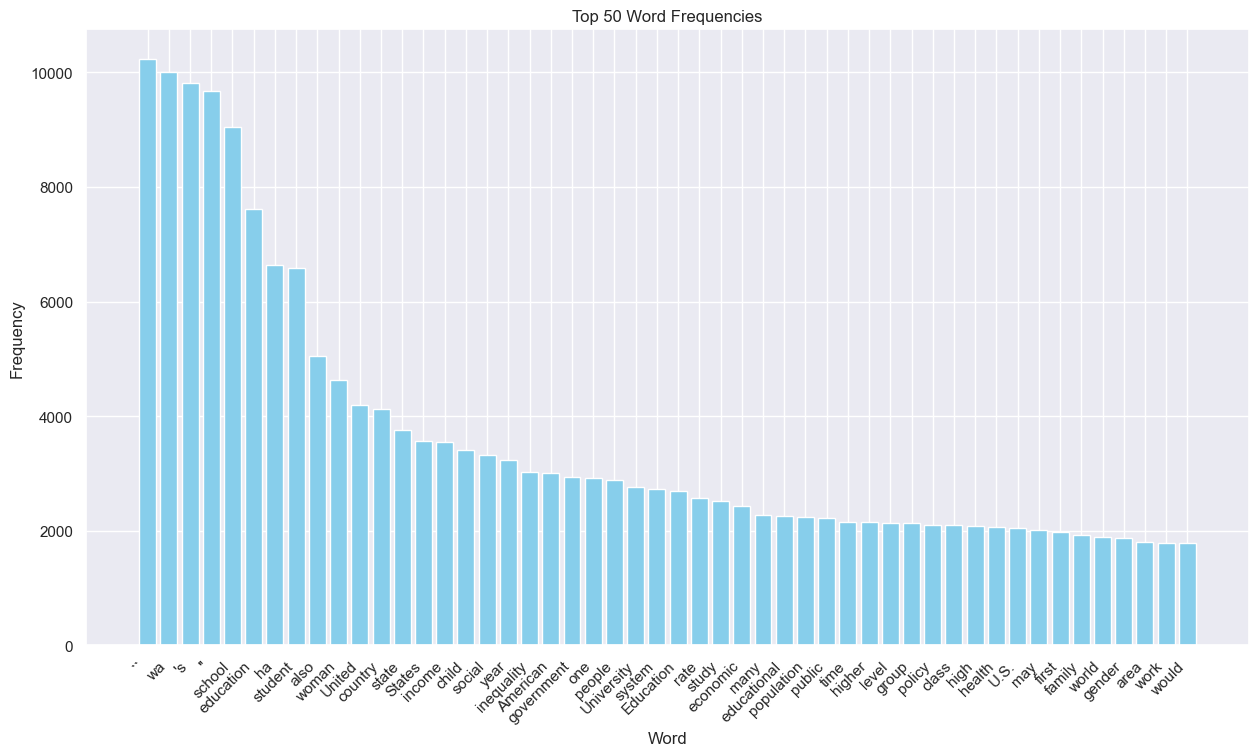

In [39]:
# plots a bar chart of the top 50 word frequencies
plt.figure(figsize=(15, 8))
plt.bar(df_word_freq['Word'][:50], df_word_freq['Frequency'][:50], color='skyblue')
plt.title('Top 50 Word Frequencies')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
